In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeRegressor
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [2]:
url = 'https://www.datosdeciclismo.com/api/actividades/?atleta=&a%C3%B1o=&mes=&dia=&tipo='

In [3]:
contenido = requests.get(url).text

In [4]:
objeto = json.loads(contenido)

In [5]:
lista = []

In [6]:
for i in range(len(objeto)):
    
    id = i
    fecha = [*objeto.values()][i]['Fecha']
    año = [*objeto.values()][i]['Año']
    mes = [*objeto.values()][i]['Mes']
    dia = [*objeto.values()][i]['Día']
    tipo = [*objeto.values()][i]['Tipo']
    altura = [*objeto.values()][i]['Altura']
    cadencia = [*objeto.values()][i]['Cadencia']
    distancia = [*objeto.values()][i]['Distancia']
    potencia = [*objeto.values()][i]['Potencia']
    pulsaciones = [*objeto.values()][i]['Pulsaciones']
    tiempo = [*objeto.values()][i]['Tiempo']
    velocidad = [*objeto.values()][i]['Velocidad']
    atleta = [*objeto.values()][i]['Atleta']
        
    lista.append([id,fecha,año,mes,dia,tipo,altura,cadencia,distancia,potencia,pulsaciones,tiempo,velocidad,atleta])

In [7]:
df = pd.DataFrame(lista, columns = ('id','fecha','año','mes','dia','tipo','altura','cadencia','distancia','potencia','pulsaciones','tiempo','velocidad','atleta') )

In [8]:
df.head()

,id,fecha,año,mes,dia,tipo,altura,cadencia,distancia,potencia,pulsaciones,tiempo,velocidad,atleta
0,0,20211108,2021,11,8,Virtual,122.0,86.1,80.33,186.1,108.7,2:00:01,40.16,Fernando Gonzalez
1,1,20211107,2021,11,7,Ruta,975.0,90.4,147.46,153.4,178.6,3:55:44,37.53,Federico Gonzalez
2,2,20211107,2021,11,7,Ruta,108.0,82.6,59.25,151.0,120.9,2:02:39,28.98,Renzo Gherbassi
3,3,20211107,2021,11,7,Ruta,346.0,80.9,110.00,185.6,102.0,3:52:10,28.43,Fernando Gonzalez
4,4,20211106,2021,11,6,Virtual,842.0,86.3,10.04,157.2,151.7,1:04:31,9.34,Agustin Perez


In [9]:
df.shape

(1694, 14)

In [10]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
dummy_oneHot = onehot_encoder.fit_transform(df[['atleta']])
dummy_oneHot = pd.DataFrame(dummy_oneHot.toarray(),columns= np.sort(df['atleta'].unique()[~pd.isna(df['atleta'].unique())]) )
dummy_oneHot.head()

,Agustin Perez,Andres Domaica,Eduardo Larrauri,Federico Gonzalez,Fernando Gonzalez,Hugo Huzan,Lucas Arce,Renzo Gherbassi,Sebastian Migliaccio
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df = df.loc[ (df.atleta == 'Fernando Gonzalez') & (df.cadencia > 0) & (df.potencia > 0) & (df.pulsaciones > 0) & (df.pulsaciones < 160) , : ]

In [12]:
df.shape

(410, 14)

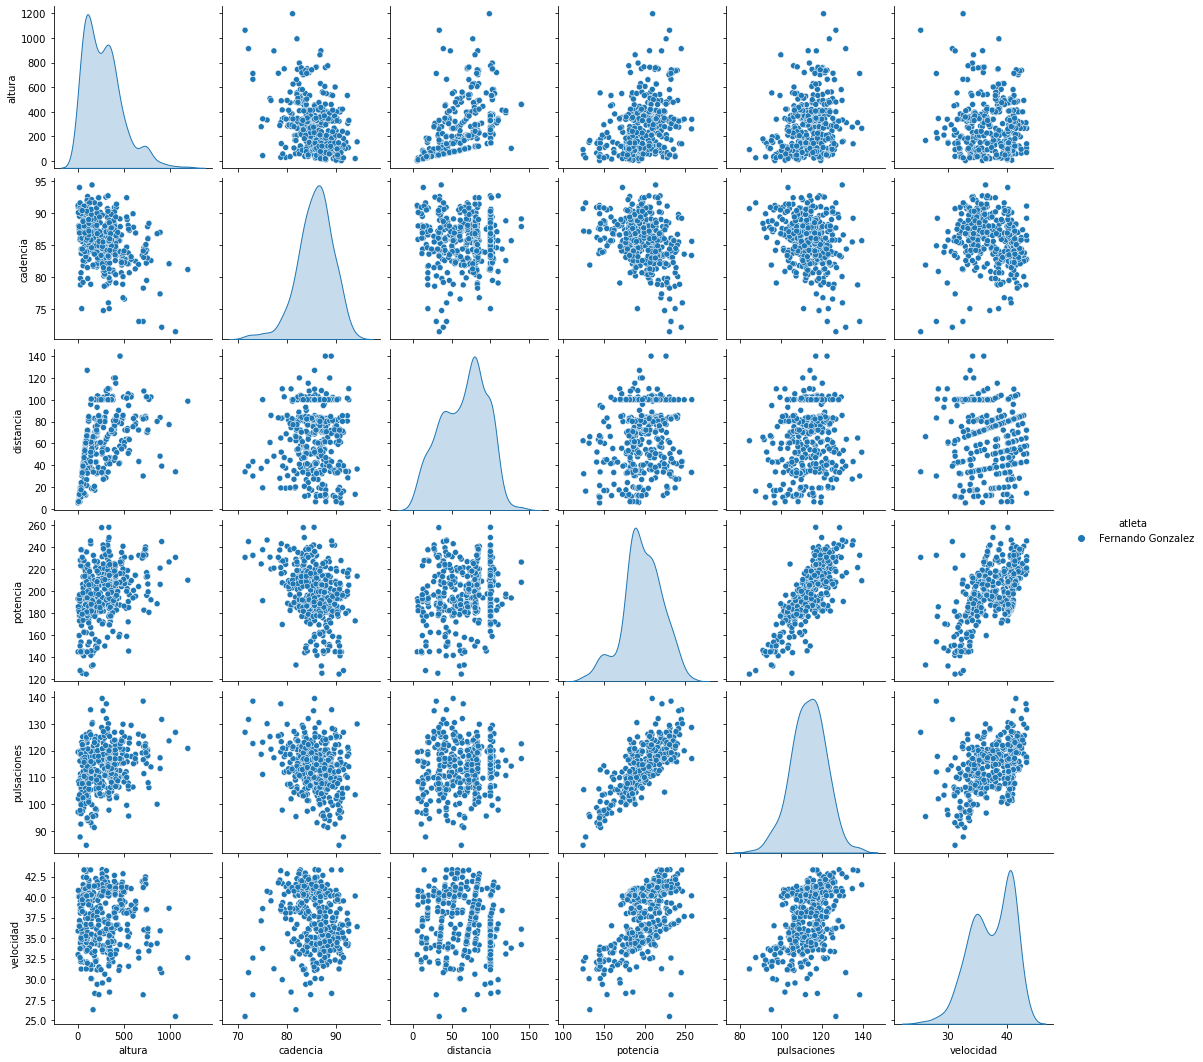

In [13]:
sns.pairplot(df.iloc[:,5:],hue='atleta');

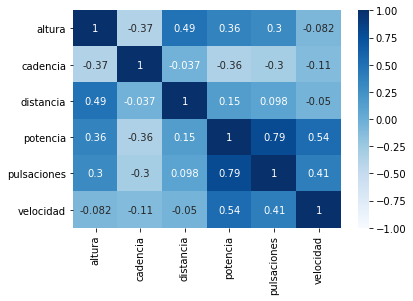

In [14]:
sns.heatmap(df.iloc[:,5:].corr(), annot=True, vmin=-1, cmap='Blues');

In [15]:
#df = pd.concat([df,dummy_oneHot],axis=1)
#df.head()

In [16]:
#model = DecisionTreeRegressor(random_state=1)
model = LinearRegression()

In [17]:
feature_cols = ['pulsaciones']
X = df[feature_cols]
y = df[['potencia']]

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [19]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [20]:
model.coef_

array([[2.19251143]])

In [21]:
model.intercept_

array([-50.76185249])

In [23]:
test = 120

In [24]:
model.intercept_ + model.coef_*test

array([[212.33951896]])

In [25]:
test_sklearn = np.array(test).reshape(-1,1)
model.predict(test_sklearn)

array([[212.33951896]])

In [26]:
ypred = model.predict(Xtest)

In [27]:
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 11.42
MSE: 209.83
RMSE: 14.49
R2: 0.71


In [ ]:
#print("Pulsaciones?")
#pulsaciones = int(input())
#print("La potencia estimada para" , pulsaciones, "pulsaciones es de", model.predict([[pulsaciones]]), "watts")